In [1]:
from pathlib import Path
import numpy as np

PROJ_ROOT = Path.cwd().resolve().parents[1]
KEYPOINT_DATA_DIR = PROJ_ROOT / "data" / "keypoints"

PIF_PAF = KEYPOINT_DATA_DIR / "pif_paf"
arrays = [np.load(sample_path) for sample_path in PIF_PAF.iterdir()]
pif_paf = np.stack(arrays)
pif_paf.shape

(30, 20, 2, 21, 3)

In [2]:
# single_recording | one_frame | one_hand (right) | all_keypoints | all_coordinates
rec0_frame0 = pif_paf[0,0,1,:,:]
print(rec0_frame0)
wrist_coord = rec0_frame0[0,:]
print(wrist_coord)

# center all keypoints in relation to the wrist coordinate, making them independent from position on camera, dependent on position to each other
rec0_frame0_centered = rec0_frame0 - np.vstack([wrist_coord]*21).squeeze()
rec0_frame0_centered

[[ 7.4560040e-01  6.4387900e-01 -4.9634785e-10]
 [ 7.0139033e-01  5.5110908e-01 -2.6257647e-02]
 [ 6.3278753e-01  4.5259631e-01 -5.9128724e-02]
 [ 5.8734602e-01  3.7808597e-01 -8.1926242e-02]
 [ 5.8434778e-01  3.1018355e-01 -1.0829099e-01]
 [ 6.5613884e-01  5.0329071e-01 -1.6339420e-01]
 [ 6.2235278e-01  4.8134816e-01 -2.2575989e-01]
 [ 5.8414811e-01  4.9581906e-01 -2.5706276e-01]
 [ 5.6846398e-01  5.0007093e-01 -2.7619761e-01]
 [ 6.6170126e-01  5.8142728e-01 -1.6737792e-01]
 [ 6.2912464e-01  5.7868922e-01 -2.4049273e-01]
 [ 5.7604444e-01  5.8717102e-01 -2.7140480e-01]
 [ 5.6452805e-01  5.9065878e-01 -2.9492709e-01]
 [ 6.7144543e-01  6.6414863e-01 -1.6258031e-01]
 [ 6.3079542e-01  6.8187654e-01 -2.2494957e-01]
 [ 5.8008593e-01  6.8926913e-01 -2.4815728e-01]
 [ 5.6666005e-01  6.7946821e-01 -2.6328644e-01]
 [ 6.7827892e-01  7.3705977e-01 -1.5526174e-01]
 [ 6.3077933e-01  7.7766567e-01 -2.0669720e-01]
 [ 5.9650129e-01  7.7330357e-01 -2.2804905e-01]
 [ 5.8723313e-01  7.4929595e-01 -2.43996

array([[ 0.        ,  0.        ,  0.        ],
       [-0.04421008, -0.09276992, -0.02625765],
       [-0.11281288, -0.19128269, -0.05912872],
       [-0.15825438, -0.26579303, -0.08192624],
       [-0.16125262, -0.33369544, -0.10829099],
       [-0.08946157, -0.14058828, -0.1633942 ],
       [-0.12324762, -0.16253084, -0.2257599 ],
       [-0.1614523 , -0.14805993, -0.25706276],
       [-0.17713642, -0.14380807, -0.2761976 ],
       [-0.08389914, -0.06245172, -0.16737792],
       [-0.11647576, -0.06518978, -0.24049273],
       [-0.16955596, -0.05670798, -0.2714048 ],
       [-0.18107235, -0.05322021, -0.2949271 ],
       [-0.07415497,  0.02026963, -0.16258031],
       [-0.11480498,  0.03799754, -0.22494957],
       [-0.16551447,  0.04539013, -0.24815728],
       [-0.17894036,  0.03558922, -0.26328644],
       [-0.06732148,  0.09318078, -0.15526174],
       [-0.11482108,  0.13378668, -0.2066972 ],
       [-0.14909911,  0.12942457, -0.22804905],
       [-0.15836728,  0.10541695, -0.243

In [3]:
# now scale the keypoints so that same gesture at different distances of the camera has same/similar keypoints coordinates
# if we dont do this then for example in ✌️ distance between index and middle finger will be significantly bigger when close to camera vs far from camera; same for all other keypoints distances
# normalise based on distance between wrist and one of the MCP points (5, 9, 13 or 17) as palm bones don't change no matter the hand gesture
# https://mediapipe.readthedocs.io/en/latest/solutions/hands.html

# in frame 0:
middle_finger_mcp = rec0_frame0_centered[9]
scale = np.linalg.norm(middle_finger_mcp) # Euclidean distance (MCP to wrist)
eps = 1e-6 # so called epsilon, to avoid division by 0
rec0_frame0_normalised = rec0_frame0_centered / max(scale, eps)
rec0_frame0_normalised

array([[ 0.        ,  0.        ,  0.        ],
       [-0.22399668, -0.4700321 , -0.13303813],
       [-0.5715826 , -0.96916115, -0.29958415],
       [-0.8018185 , -1.3466784 , -0.41509104],
       [-0.81700945, -1.6907157 , -0.54867184],
       [-0.45326984, -0.7123107 , -0.8278601 ],
       [-0.62445176, -0.8234858 , -1.1438448 ],
       [-0.8180212 , -0.75016683, -1.3024453 ],
       [-0.89748704, -0.72862417, -1.3993948 ],
       [-0.425087  , -0.31642058, -0.84804416],
       [-0.5901411 , -0.33029336, -1.2184908 ],
       [-0.85907954, -0.2873191 , -1.3751113 ],
       [-0.91742903, -0.26964784, -1.4942904 ],
       [-0.37571678,  0.102699  , -0.8237364 ],
       [-0.5816759 ,  0.19252   , -1.1397392 ],
       [-0.8386028 ,  0.22997558, -1.2573243 ],
       [-0.90662694,  0.18031786, -1.3339784 ],
       [-0.3410939 ,  0.47211373, -0.78665584],
       [-0.5817574 ,  0.67784935, -1.0472609 ],
       [-0.755432  ,  0.6557481 , -1.1554432 ],
       [-0.80239046,  0.53411007, -1.236

In [4]:
# now, the same but for all frames and all recordings in pif_paf

# Center all keypoints in a given frame for each hand based on its wrist coordinates
    # get wrists coords
wrist_coords = pif_paf[:,:,:,0,:] # wrist_coords.shape = (30, 20, 2, 3)

    # expand shape / broadcast to match pif_paf.shape
wrist_coords = np.expand_dims(wrist_coords, axis=3) # wrist_coords.shape = (30, 20, 2, 1, 3)
wrist_coords = np.tile(wrist_coords, (1,1,1,21,1)) # wrist_coords.shape = (30, 20, 2, 21, 3)

    # substract, print example sequence
pif_paf_centered = pif_paf - wrist_coords


# Normalise the hand size to be independent from the camera distance
middle_mcp_coords = pif_paf_centered[:,:,:,9,:] # middle_mcp_coords.shape = (30, 20, 2, 3)
scales = np.linalg.norm(middle_mcp_coords, axis=-1) # scales.shape = (30, 20, 2)

    # ensure no 0s for safe division
eps = 1e-6
scales = np.maximum(scales, eps)

    # expand shape / broadcast to match pif_paf_centered.shape
scales = np.expand_dims(scales, axis=3)
scales = np.expand_dims(scales, axis=4)
scales = np.tile(scales, (1,1,1,21,3))

    # divide 
pif_paf_normalised = pif_paf_centered / scales
pif_paf_normalised

array([[[[[ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          ...,
          [ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ]],

         [[ 0.        ,  0.        ,  0.        ],
          [-0.22399668, -0.4700321 , -0.13303813],
          [-0.5715826 , -0.96916115, -0.29958415],
          ...,
          [-0.5817574 ,  0.67784935, -1.0472609 ],
          [-0.755432  ,  0.6557481 , -1.1554432 ],
          [-0.80239046,  0.53411007, -1.2362455 ]]],


        [[[ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          ...,
          [ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ]],

         [[ 0.        ,  0.  

x-axis


100%|██████████| 21/21 [00:00<00:00, 31.47it/s]


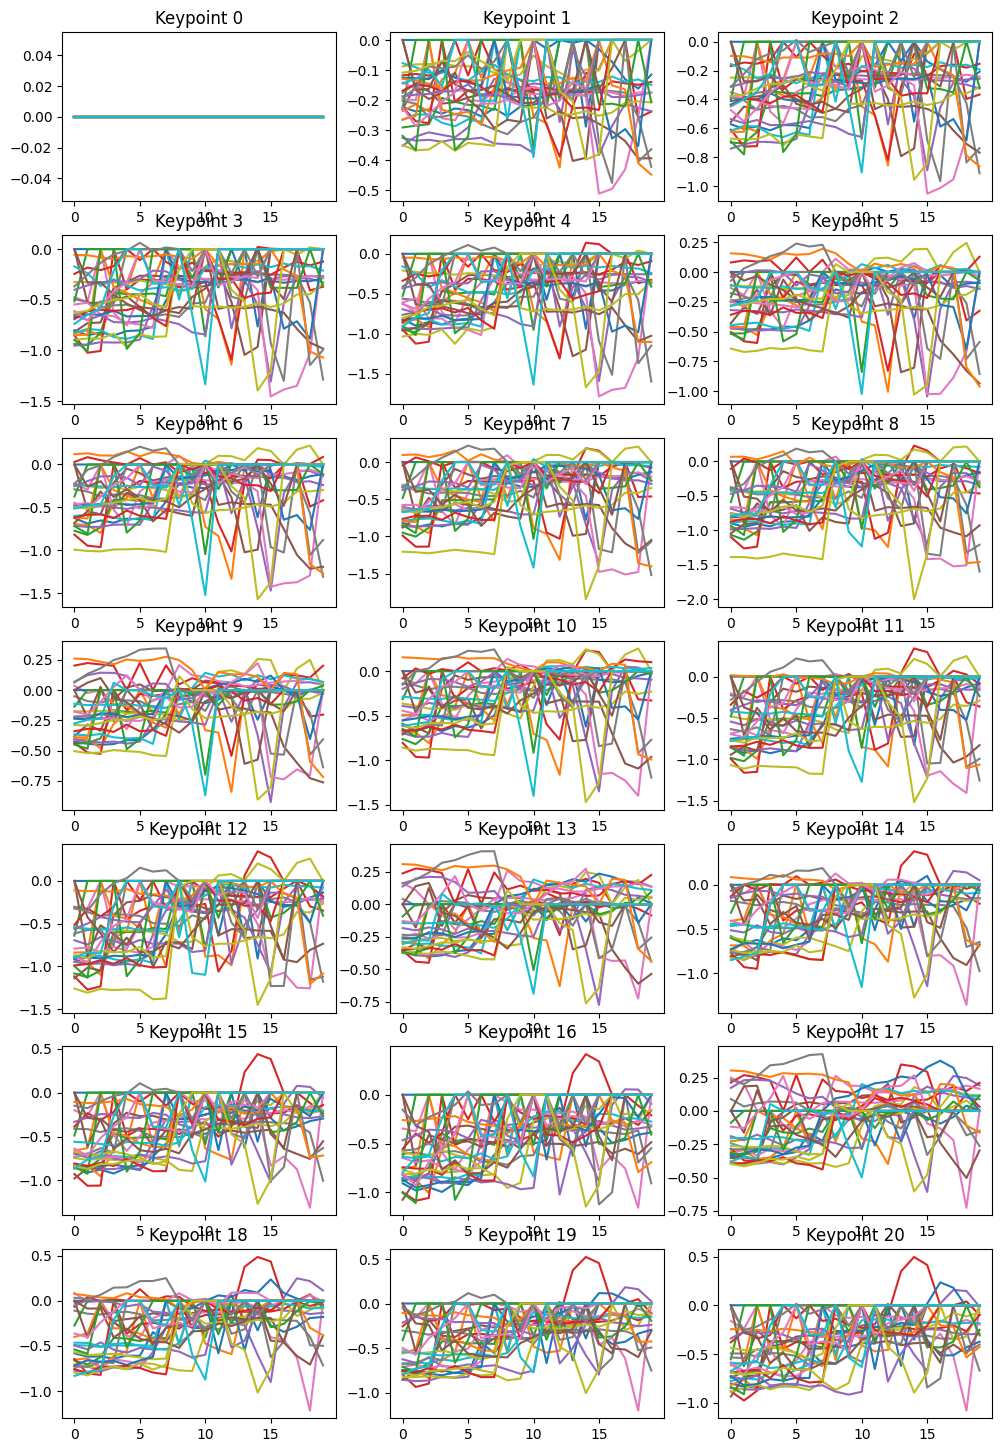

y-axis


100%|██████████| 21/21 [00:00<00:00, 23.01it/s]


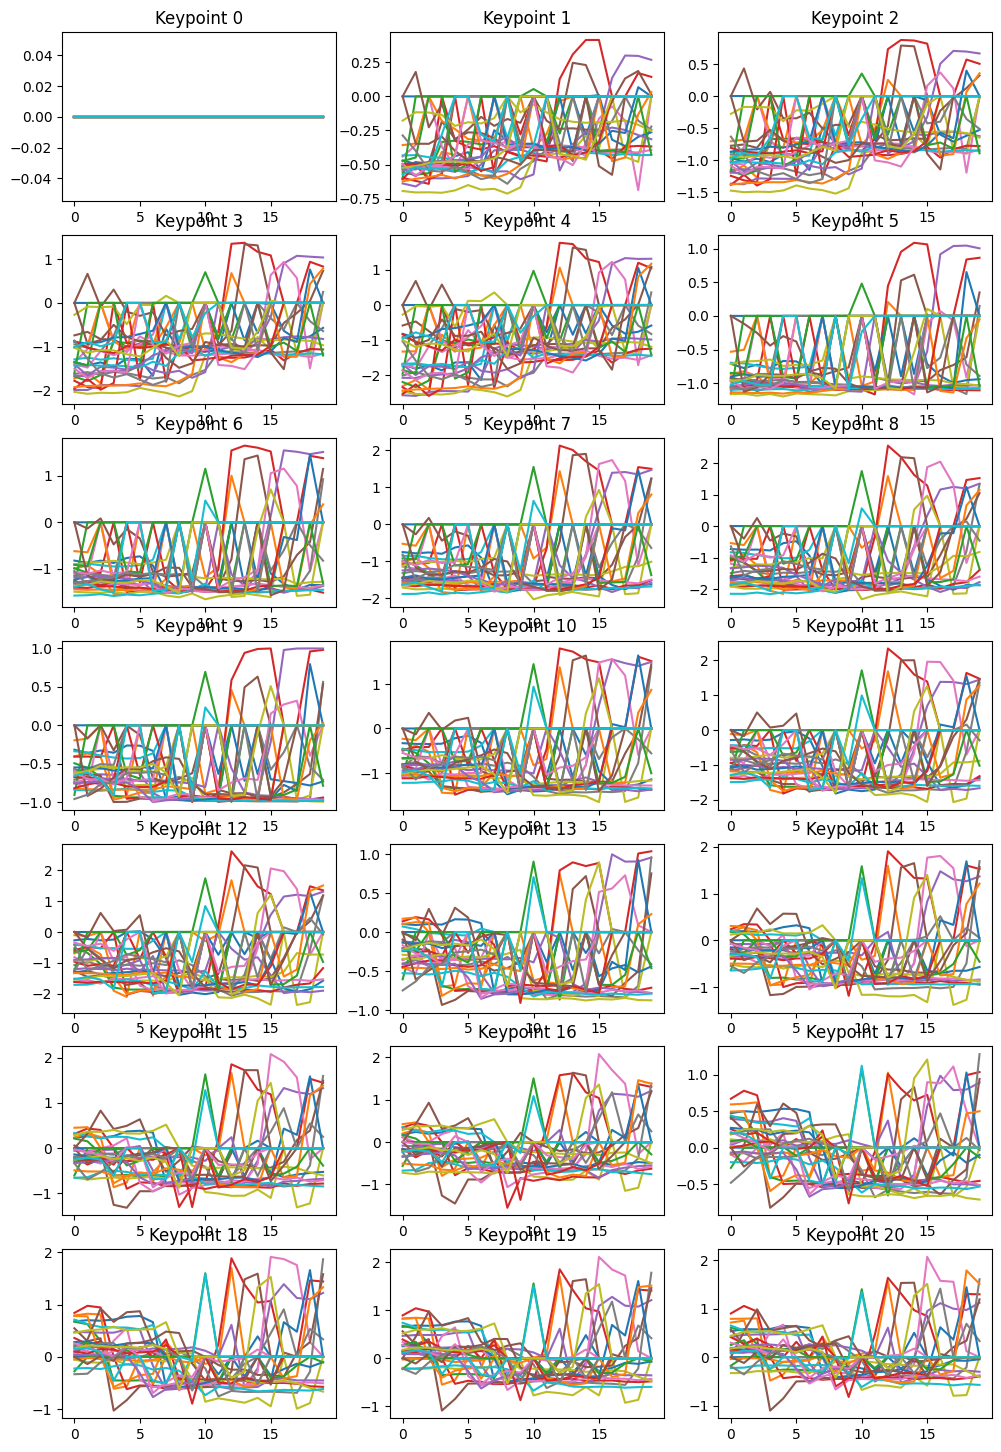

z-axis


100%|██████████| 21/21 [00:01<00:00, 14.93it/s]


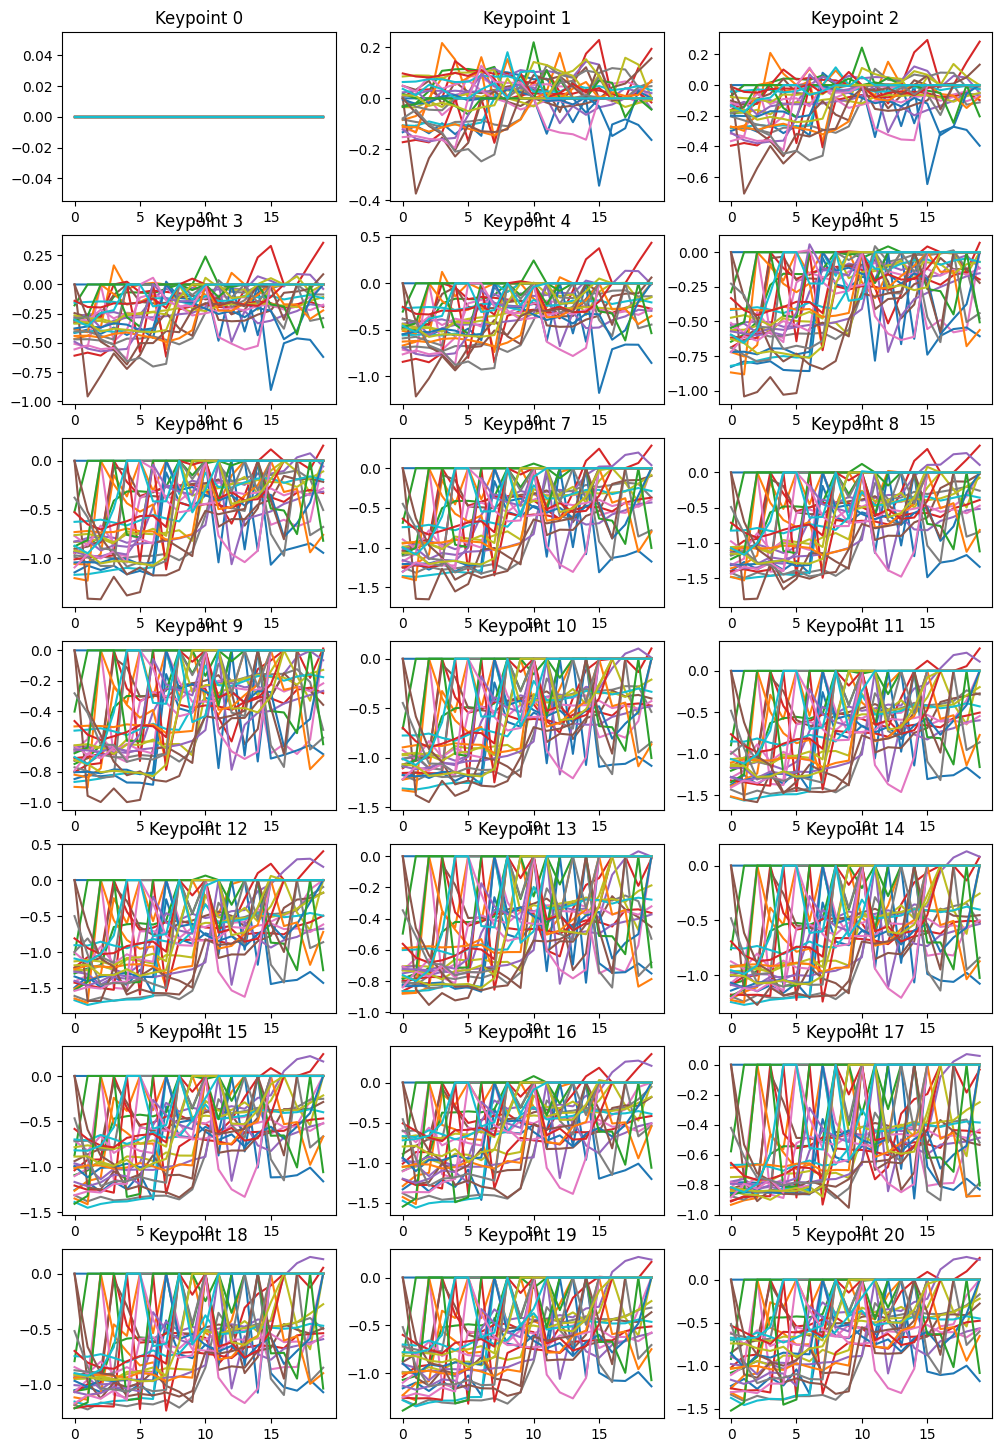

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm

frames = np.arange(0,20)
coordinate = 1 

for coordinate in range(3):
    # each keypoint is (x,y,z); so if coordinate =1 we will display movement across the y-axis on the video
    coordinate_id_to_letter = {0: 'x', 1: 'y', 2: 'z'}
    print(f"{coordinate_id_to_letter[coordinate]}-axis")

    fig, axes = plt.subplots(7, 3, figsize=(12, 18))  
    axes = axes.flatten()

    for keypoint_id in tqdm(range(21)):
        # each subplot - different hand keypoint out of 21 tracked

        for rec in range(30):
            # each line on a given subplot - different recording of pif_paf gesture
            keypoint_sequence = pif_paf_normalised[rec][:,1,keypoint_id,coordinate]
            axes[keypoint_id].plot(frames, keypoint_sequence)
            axes[keypoint_id].set_title(f"Keypoint {keypoint_id}")

    plt.show()

# as expected, the pattern is visible on the y-axis for the pif-paf gesture
# especially fingers tips (7,8, 11,12, 15,16, 19,20)

# its also visible that lines are scattered, mostly because once every frame the hand is lost and all keypoints = 0
# its possible that removing these would result in better results, altough maybe the algorithm will learnt to ignore it on its own